# Final project guidelines

**Note:** Use these guidelines if and only if you are pursuing a **final project of your own design**. For those taking the final exam instead of the project, see the (separate) [final exam notebook](https://github.com/wilkens-teaching/info3350-f20/blob/master/final_exam/final_exam.ipynb).

## Guidelines

These guidelines are intended for **undergraduates enrolled in INFO 3350**. If you are a graduate student enrolled in INFO 6350, you're welcome to consult the informartion below, but you have wider latitude to design and develop your project in line with your research goals.

### The task

Your task is to: identify an interesting problem connected to the humanities or humanistic social sciences that's addressable with the help of computational methods, formulate a hypothesis about it, devise an experiment or experiments to test your hypothesis, present the results of your investigations, and discuss your findings.

These tasks essentially replicate the process of writing an academic paper. You can think of your project as a paper in miniature.

You are free to present each of these tasks as you see fit. You should use narrative text (that is, your own writing in a markdown cell), citations of others' work, numerical results, tables of data, and static and/or interactive visualizations as appropriate. Total length is flexible and depends on the number of people involved in the work, as well as the specific balance you strike between the ambition of your question and the sophistication of your methods. But be aware that numbers never, ever speak for themselves. Quantitative results presented without substantial discussion are unlikely to earn high marks. 

Your project should reflect, at minimum, ten or more hours of work by each participant, though you will be graded on the quality of your work, not the amount of time it took you to produce it.

### Format

You should submit your project as a Jupyter notebook, along with all data necessary to reproduce your analysis. If your dataset is too large to share easily, let us know in advance so that we can find a workaround. If you have a reason to prefer a presentation format other than a notebook, likewise let us know so that we can discuss the options.

Your report should have four basic sections (provided in cells below for ease of reference):

1. **Introduction and hypothesis.** What problem are you working on? Why is it interesting and important? What have other people said about it? What do you expect to find?
2. **Corpus, data, and methods.** What data have you used? Where did it come from? How did you collect it? What major methods will you use to analyze it? Why are those methods the appropriate ones?
3. **Results.** What did you find? How did you find it? How should we read your figures?
4. **Discussion and conclusions.** What does it all mean? Do your results support your hypothesis? Why or why not? What are the limitations of your study and how might those limitations be addressed in future work?

Within each of those sections, you may use as many code and markdown cells as you like. You may, of course, address additional questions or issues not listed above.

All code used in the project should be present in the notebook (except for widely-available libraries that you import), but **be sure that we can read and understand your report in full without rerunning the code**. Be sure, too, to explain what you're doing along the way, both by describing your data and methods and by writing clean, well commented code.

### Grading

This project takes the place of the take-home final exam for the course. It is worth 20% of your overall grade. You will be graded on the quality and ambition of each aspect of the project. No single component is more important than the others.

### Practical details

* The project is due at **5:00pm EST on Saturday, December 19, 2020** via upload to CMS.
* You may work alone or in a group of up to three total members.
    * If you work in a group, be sure to list the names of the group members.
    * For groups, submit one notebook for the entire group. **Each group member should also submit an individual statement of responsibility** that describes in general terms who performed which parts of the project.
* You may post questions on Campuswire, but should do so privately (visible to course staff only).
* Interactive visualizations do not always work when embedded in shared notebooks. If you plan to use interactives, you may need to host them elsewhere and link to them.

---

# Info Wars: Building a Fake News Classifier based on 2016 Presidential Election Related Articles

## 1. Introduction and hypothesis

NPR reported that in the months leading up to the 2016 presidential election, the top 20 fake news stories beat out the top 20 hard news in terms of engagement (shares, reactions and comments) on Facebook (Kurtzleben, 2018). These findings from Buzzfeed Analysis underscores the extent to which disinformation has penetrated American media ecosystem, and is further amplified by social media's ease in sharing false content outside of personal networks. Since then, there have been many calls for meaningful content regulation of fake news on social media. At the heart of this problem is finding a way to distinguish real news from false ones. We hope to build off of the existing work done by many computer scientists and machine learning researchers to utilize the methods and tools we've learned in this course to build a model that classifies real and fake news stories. 
We were also inspired by another study from Cornell University researchers, which analyzed English-language articles about the pandemic and found that President Trump was the largest driver of coronavirus misinformation (Stolberg and Weiland, 2020). Thus, we aimed to also apply a similar scope to our project and analyze one set of related articles in a specific timeframe, and all of which are considered "hard news". This is defined to be serious news concerning foreign affairs, politics or recent events considered to be of national or international significance (Britannica). 
In addition, we also analyzed multiple academic papers to familiarize ourselves on existing methodologies and approaches to building a fake news classifier. We evaluated methods both in data pre-processing and also model selection. Our goal was to train a classifier based on 2016 hard news, and evaluate accuracy of the model. 
Methods we used to iterate and optimize our classifier (and expanded on below) include: lemmatization, tokenization, vectorization, selectkbest, and SVC, MLP, decision tree and random forest. 
We hypothesize that Trump will likely be a highly relevant feature in our classifier, and we are interested in exploring the other relevant word-based features to include in our final model. We also anticipate that the decision tree classifier, as a consequence of its tendency towards overfitting, will produce our highest accuracy score in terms of classifiers.


## 2. Data processing and corpus building 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


import seaborn as sns

In [2]:
text_data = 'fake_or_real_news.csv'
text_df = pd.read_csv('fake_or_real_news.csv')
text_df.head()

#text_df.iloc[0].text
# text_df.iloc[6330].text

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Data Preprocessing

In [3]:
#we want to filter out empty stories (keep only len texts > 0
# text_df.drop(labels=['id','title'], axis='columns', inplace=True)
# mask = list(text_df['text'].apply(lambda x: len(x) > 0))
# df = text_df[mask]

In [4]:
text_col = text_df['text']
y_labels = text_df['label']

display(y_labels)
# text_col[1]

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [5]:
#encoding y_labels truth/fake column to binary values 
y_labels = []

for n in text_df['label']:
    if n == 'REAL': 
        y_labels.append(0)
    else: 
        y_labels.append(1)
        
text_df['binary'] = y_labels
text_df

y_labels = y_labels[0:500]

print(len(y_labels))

500


In [6]:
#sample data for dev, comment out at the end 

text_col = text_df['text'][0:500]
y_tf_labels = text_df['label'][0:500]
print(len(y_tf_labels))

500


In [7]:
def word_stats(data, n=500):
    '''
    Print total wordcount and n top terms.
    Takes a Counter object and a number of terms to print.
    Returns None.
    '''
    print('Total words in the text:', sum(data.values()))
    print('\nTop X num words by frequency:')
    for word in data.most_common(500):
        print(word[0], '\t', word[1])
    return None

In [8]:
# # Install spaCy
# !conda install -c conda-forge spacy spacy-lookups-data -y
# !python -m spacy download en_core_web_sm

In [9]:
# tokenize words (pset 2 tokenization, lemmatization, pset 6 classification)
# for loop over text column, 

from collections import Counter
from nltk import word_tokenize

from nltk.corpus import stopwords
import string
import re
import spacy


stops = stopwords.words('english')

custom_stops = [ #do some research on if there's a "list" out this
    '`',
    "'s",
    "n't",
    "’", 
    '“', 
    '”', 
    '–',
    '—', 
    '000', 
    '10', 
    'worth'
]

for tok in custom_stops:
    stops.append(tok)

# find punctuation-and/or-digit-only tokens 
punct_digit = re.compile(f"^[{string.punctuation}\d]+$")

text_nltk = Counter()

# remove stop words, punctuation, other attributes/ spaces etc 

for article in text_col:
    for token in word_tokenize(article.strip().lower()):
        if token not in stops and token.isalpha and token.isnumeric()==False and punct_digit.match(token) is None: #excludes punct
            text_nltk[token] +=1

word_stats(text_nltk)

#tfidif, inverse doc weighting 


Total words in the text: 230435

Top X num words by frequency:
trump 	 1928
said 	 1788
clinton 	 1666
would 	 1020
people 	 935
one 	 876
obama 	 837
new 	 797
state 	 766
campaign 	 727
president 	 696
also 	 672
us 	 658
hillary 	 617
could 	 581
time 	 559
like 	 552
states 	 500
party 	 492
even 	 491
republican 	 470
many 	 469
two 	 461
going 	 455
first 	 453
election 	 440
government 	 436
donald 	 425
country 	 416
house 	 413
get 	 406
make 	 396
political 	 395
way 	 394
american 	 392
sanders 	 392
last 	 391
world 	 390
news 	 388
u.s. 	 388
think 	 385
years 	 381
much 	 363
know 	 354
told 	 354
democratic 	 344
america 	 344
say 	 344
may 	 342
right 	 337
voters 	 333
republicans 	 323
presidential 	 323
percent 	 323
white 	 321
back 	 319
vote 	 318
made 	 312
well 	 311
war 	 306
support 	 301
still 	 299
day 	 298
see 	 293
americans 	 292
former 	 292
national 	 288
year 	 286
media 	 284
democrats 	 283
public 	 283
want 	 282
take 	 282
washington 	 281
candida

### Lemmatization

In [10]:
# Write a preprocessor: tokenize and lemmatize as indicated
#need a Doc or Span or Dict(true) obj in place of text_col
# from spacy import displacy
# displacy.render(text_col, style='dep', options={'distance':100}) # Dependency parse


In [11]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm')
def lemmatizer(text):
    lemm_tokens = []
    
    #initialize to empty string 
    lemm_text_str = '' #space separated words, then use tfidif on this 
    
    doc = nlp(text)
    
    for token in doc:
        if len(token) >0:
            if len(token.lemma_.strip())>0:
                if token.pos_ != "PUNCT":
                    if token.is_stop==False:
                        if token.is_alpha==True:
#                         lemm_text_str + token.orth_ + ' '
                            lemm_tokens.append(token.lemma_)


                        #join each token to string with space 

    #return lemm_text_str
    return lemm_tokens

# #rewrite function, takes in df col of text, returns 
# #OR use pandas apply method to the column, will incr apply 
# #over col with old raw texts, store in new col, single line with apply
# #call apply method on text col, pass in lemmtaizer function

# #set up vectorizer to take full lemma corpus 
    

In [12]:
# lemma_str_list = np.zeros(len(text_df))
# print(len(lemma_str_list))

In [13]:
#convert every item in text_col to a str of lemmas, put into lemma str list 
# lemma_str_list = np.zeros(len(text_df))
# print(lemma_str_list)

lemma_str_list = []
for article_text in text_col:
    temp_str = ''
    #index_num = text_col.index(article_text)
    
    temp_lemm = lemmatizer(article_text)
    for token in temp_lemm:
        temp_str+=token + ' '
    lemma_str_list.append(temp_str)
print(len(lemma_str_list))

500


In [14]:
#6335-500

In [15]:
i = 0
while (i<5835):
    lemma_str_list.append(0)
    i+=1    
print(len(lemma_str_list))

6335


In [16]:
#put lemma str list into new col of df 

text_df['lemma_str'] = lemma_str_list
text_df['lemma_str'].head()

0    Daniel Greenfield Shillman Journalism Fellow F...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    Secretary State John Kerry say Monday stop Par...
3    Kaydee King November lesson tonight dem loss t...
4    primary day New York runner Hillary Clinton Do...
Name: lemma_str, dtype: object

### Lemma Vectorize 

In [17]:
# #using 2020 dataset 
# lemm_matrix2020 = count_vectorizer.fit(text_nltk2020)
# #lemm_matrix2020.toarray() can't use to array if just fit instead of fit transform 
# #print(lemm_matrix2020.vocabulary_)
# #encode document
# vector = count_vectorizer.transform(text_nltk2020)
# lemm_matrix2020 = vector.toarray()
# lemm_matrix_scaled2020 = scaler.fit(lemm_matrix2020)
# lemm_term = pd.DataFrame(lemm_matrix2020, columns=count_vectorizer.get_feature_names())
# display(lemm_term)

In [18]:
#Delete for final submission
lemma_str_col = text_df['lemma_str'][0:500]
len(lemma_str_col)
type(lemma_str_col)

pandas.core.series.Series

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from   sklearn.preprocessing import StandardScaler

# data vectorizer
count_vectorizer = CountVectorizer(analyzer = "word", 
                             binary = True, 
                             min_df = 2,
                             stop_words='english')

lemm_matrix = count_vectorizer.fit_transform(lemma_str_col).toarray()
lemm_matrix_scaled = StandardScaler().fit_transform(lemm_matrix)
lemm_term = pd.DataFrame(lemm_matrix, columns=count_vectorizer.get_feature_names())

In [20]:
# Get the dimensions of the doc-term matrix
print("text matrix shape:", lemm_matrix.shape)
print("text scaled matrix shape:", lemm_matrix_scaled.shape)
print("text term shape:", lemm_term.shape)

#display(text_array)
display(lemm_term)

text matrix shape: (500, 9111)
text scaled matrix shape: (500, 9111)
text term shape: (500, 9111)


,aaron,aback,abandon,abbas,abbott,abc,abduct,abedin,abhor,abide,...,zilch,zimmerman,zionism,zionist,zip,zone,zones,zor,zuckerberg,zuckerburg
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cross Validation and select k best 

In [21]:
feature_names = np.array(lemm_term.columns)

In [22]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector_obj = SelectKBest(mutual_info_classif, k=300)

feature300_array= selector_obj.fit_transform(lemm_matrix_scaled, y_labels) #should y be used instead of labels?

#display(feature_array)
feature300_array.shape

#feature300_term = pd.DataFrame(feature300_array, columns= count_vectorizer.get_feature_names())

mask = selector_obj.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)

In [23]:
new_features

['ablaze',
 'academia',
 'acuman',
 'addict',
 'adventure',
 'advisor',
 'alarm',
 'anew',
 'animal',
 'ann',
 'anoint',
 'antimedia',
 'anytime',
 'apparent',
 'applicant',
 'appointment',
 'arabia',
 'arthur',
 'assessment',
 'associated',
 'atlantic',
 'attain',
 'attendance',
 'attract',
 'australia',
 'backing',
 'bailout',
 'barrier',
 'bartender',
 'begin',
 'beginning',
 'behold',
 'berlin',
 'bleak',
 'blood',
 'bloomberg',
 'boehner',
 'bogus',
 'bold',
 'boo',
 'boston',
 'brush',
 'brutal',
 'bryant',
 'bureaucracy',
 'campaign',
 'candidacy',
 'cap',
 'castro',
 'catholic',
 'caucus',
 'certify',
 'challenge',
 'charleston',
 'cheryl',
 'cheste',
 'chinese',
 'citizen',
 'clinic',
 'closet',
 'coalition',
 'cohort',
 'colossal',
 'comfortable',
 'confirmation',
 'confrontation',
 'consistently',
 'consumption',
 'converge',
 'coordination',
 'core',
 'cosmetic',
 'creature',
 'crossroad',
 'cruz',
 'dark',
 'data',
 'deadly',
 'deception',
 'decisive',
 'declare',
 'declin

## Methods and Results

### Classifiers

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from   sklearn.feature_extraction.text import TfidfVectorizer
from   sklearn.feature_selection import SelectKBest, mutual_info_classif
from   sklearn.linear_model import LogisticRegression, LinearRegression
from   sklearn.model_selection import cross_val_score
from   sklearn.preprocessing import StandardScaler
import spacy
import sqlite3
from scipy import stats
import statsmodels.stats.api as sms
from sklearn.model_selection import GridSearchCV

In [26]:
#Rough Work

In [27]:
#Test/Train Splits for later use
from sklearn.model_selection import train_test_split
TEST_SPLIT = 0.2
text_term_train, text_term_test, y_train, y_test = train_test_split(feature300_array, y_labels, test_size=TEST_SPLIT)
display(text_term_test)

array([[-0.06337243, -0.10050378, -0.10050378, ..., -0.52178983,
         7.        , -0.06337243],
       [-0.06337243, -0.10050378, -0.10050378, ..., -0.52178983,
        -0.14285714, -0.06337243],
       [-0.06337243, -0.10050378, -0.10050378, ..., -0.52178983,
        -0.14285714, -0.06337243],
       ...,
       [-0.06337243, -0.10050378, -0.10050378, ...,  1.91648042,
        -0.14285714, -0.06337243],
       [-0.06337243, -0.10050378, -0.10050378, ..., -0.52178983,
        -0.14285714, -0.06337243],
       [-0.06337243, -0.10050378, -0.10050378, ..., -0.52178983,
        -0.14285714, -0.06337243]])

In [28]:
# Examine the performance of our simple classifiers
# Freebie function to summarize and display classifier scores
def compare_scores(scores_dict):
    '''
    Takes a dictionary of cross_validate scores.
    Returns a color-coded Pandas dataframe that summarizes those scores.
    '''
    import pandas as pd
    df = pd.DataFrame(scores_dict).T.applymap(np.mean).style.background_gradient(cmap='RdYlGn')
    return df

In [29]:
#Create Function for Regression Ouput w/ Scatterplot
def reg_output(x,y,df):
    #x and y are the string column names from base_set of interest
    model = LinearRegression().fit(df[[x]],df[y])
    slope = model.coef_[0]
    intercept = model.intercept_
    rsq = model.score(df[[x]],df[y])
    r_val = np.sqrt(rsq)
    
    print('For X = ' + x + ' and Y = ' + y + ' : ')
    print("Intercept is {intercept:.3f}".format(intercept = intercept))
    print('r-squared is {rsq:.3f}'.format(rsq = rsq))
    print('r-value is {r:.3f}'.format(r = r_val))
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.scatter(df[x],df[y])
    
    #best fit code inspired by stackoverflow
    z = np.polyfit(df[x],df[y],1)
    p = np.poly1d(z)
    plt.plot(df[x],p(df[x]),"r--")
    plt.show()

In [44]:
def accuracy_conf_it(score_list):
    #Find Highest Score:
    high_score_list = []
    high_keys = score_list.keys()
    for key in high_keys:
        high_score_list.append(np.mean(score_list[key]['test_accuracy']))
    list_max = np.max(high_score_list)
    high_key=0
    for key in high_keys:
    #print(np.mean(SVC_scores[key]['test_accuracy']))
        if np.mean(score_list[key]['test_accuracy'])== list_max:
            high_key = key
    conf_set = score_list[high_key]['test_accuracy']
    #print(conf_set)
    
    n = len(conf_set)
    t = stats.t.ppf(q = 0.975, df=n-1) # Get critical value
    sigma = np.std(conf_set)       # Calculate sample standard deviation
    
    margin = t * sigma / np.sqrt(n)
    mu = np.mean(conf_set)
    low=mu-margin
    high=mu+margin
    print("Key : " + high_key)
    print("Max Mean : " + str(mu))
    print(f"95% confidence interval: ({mu-margin}, {mu+margin})")
    #return(high_key)


**Support Vector Classifier (SVC)**

The SVC, or Support Vector Classifier was selected as an unsupervised learning tool to produce a classifier for the textual data.  First, GridSearchCV was used to identify the best possible combination of parameters to pass through the classifier. The parameter grids used varied the C, kernel, and gamma parameters. C was a regularization parameter to which the strength of the classifier’s regulation is inversely proportional.  Kernel specifies the kernel type that is used in the algorithm. Gamma indicates the Kernel coefficient to be used if the Kernel is “rbf”, “poly” or “sigmoid”. 

In [35]:
#SVC GridSearch Varying C, Kernel, Gamma
#%%time
svc_param_grid = {
    'C':[0.001,0.005,0.01,0.25,0.05,0.075,0.1,0.5,0.75],
    'kernel':['rbf','linear','poly','sigmoid'],
    'gamma':['auto','scale']
}
svc_grid = GridSearchCV(SVC(),param_grid = svc_param_grid, cv=10,verbose=5,n_jobs=-1)
svc_grid.fit(feature300_array,y_labels)
print("SVC Best Estimator : " , svc_grid.best_estimator_)
print("SVC Best Score : " , svc_grid.best_score_)
print("SVC Best Parameters : " , svc_grid.best_params_)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   17.1s


SVC Best Estimator :  SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVC Best Score :  0.78
SVC Best Parameters :  {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   18.9s finished


In [38]:
#SVC Classifier Dictionary for iteration
SVC_dict = {}
SVC_dict['defaultSVC'] = SVC()
SVC_dict['SVC_1'] = SVC(C=0.001)
SVC_dict['SVC_2'] = SVC(C=0.005)
SVC_dict['SVC_3'] = SVC(C=0.010)
SVC_dict['SVC_4'] = SVC(C=0.025)
SVC_dict['SVC_5'] = SVC(C=0.050)
SVC_dict['SVC_6'] = SVC(C=0.075)
SVC_dict['SVC_7'] = SVC(C=0.100)
SVC_dict['SVC_8'] = SVC(C=0.250)
SVC_dict['SVC_9'] = SVC(C=0.500)
SVC_dict['SVC_10'] = SVC(C=0.750)
SVC_dict['SVC_11'] = SVC(C=0.750,gamma='auto')
SVC_dict['SVC_12'] = SVC(C=0.750,gamma='scale')
SVC_dict['SVC_13'] = SVC(C=0.750,gamma='auto',kernel='rbf')
SVC_dict['SVC_14'] = SVC(C=0.750,gamma='auto',kernel='linear')
SVC_dict['SVC_15'] = SVC(C=0.750,gamma='auto',kernel='sigmoid')
SVC_dict['SVC_16'] = SVC(C=0.750,gamma='auto',kernel='poly')

In [39]:
#SVC Score Dictionary for Compare Scores
SVC_scores ={}
for n in SVC_dict:
        SVC_scores[n] = cross_validate( # perform cross-validation
        SVC_dict[n], # classifier object
        feature300_array, # feature matrix
        y_labels, # gold labels
        cv=10, #number of folds
        scoring = ['accuracy']
        #scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'] # scoring methods
    )


In [40]:
#Compare Scores output displaying accuracy scores
compare_scores(SVC_scores)

,fit_time,score_time,test_accuracy
defaultSVC,0.070662,0.007690,0.736000
SVC_1,0.071264,0.007826,0.528000
SVC_2,0.072924,0.008406,0.528000
SVC_3,0.077460,0.008773,0.528000
SVC_4,0.076937,0.008640,0.528000
SVC_5,0.076107,0.008532,0.528000
SVC_6,0.076119,0.008513,0.590000
SVC_7,0.076499,0.008518,0.636000
SVC_8,0.075080,0.008106,0.680000
SVC_9,0.072919,0.007792,0.718000


The best scoring classifier came out with a score of 0.780, with the best combination of parameters setting C to 0.1, gamma to auto, and kernel to sigmoid. In order to evaluate the performance of different combinations of parameters, a list of SVC classifiers varying the C, Gamma, and Kernel Parameters was looped through, with the accuracy scores being printed, alongside the fit time and the score time for each iteration. The highest score was 0.758, whereas the lowest score came out to 0.528. 

In [45]:
#Confidence Interval for highest scoring classifier
accuracy_conf_it(SVC_scores)

Key : SVC_15
Max Mean : 0.7579999999999999
95% confidence interval: (0.7312720602731883, 0.7847279397268115)


Then, the classifier that produced the highest score was used to produce a 95% confidence interval, the low boundary was roughly 0.731 and the high boundary was roughly 0.785; in other words, we are 95% confident that the model would produce an accuracy score between 0.731 and 0.784. 

In [48]:
#SVC Classifier Dictionary for observing the influence of variation of C on accuracy score
#%%time
c_SVC_dict = {}
c_SVC_dict['SVC_1'] = SVC(C=0.001)
c_SVC_dict['SVC_2'] = SVC(C=0.005)
c_SVC_dict['SVC_3'] = SVC(C=0.010)
c_SVC_dict['SVC_4'] = SVC(C=0.025)
c_SVC_dict['SVC_5'] = SVC(C=0.050)
c_SVC_dict['SVC_6'] = SVC(C=0.075)
c_SVC_dict['SVC_7'] = SVC(C=0.100)
c_SVC_dict['SVC_8'] = SVC(C=0.250)
c_SVC_dict['SVC_9'] = SVC(C=0.500)
c_SVC_dict['SVC_10'] = SVC(C=0.750)

In [49]:
#SVC Score Dictionary for Compare Scores to observe the influence of variation of C on accuracy score
#%%time
c_SVC_scores ={}
for n in c_SVC_dict:
        c_SVC_scores[n] = cross_validate( # perform cross-validation
        c_SVC_dict[n], # classifier object
        feature300_array, # feature matrix
        y_labels, # gold labels
        cv=10, #number of folds
        scoring = ['accuracy']
        #scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'] # scoring methods
    )

In [50]:
c_list = []
accuracy_list = []
key_list = list(c_SVC_dict.keys())
for key in key_list:
    c = c_SVC_dict[key].C
    c_list.append(c)    
    acc_array = c_SVC_scores[key]['test_accuracy']
    mean_acc_array= np.mean(acc_array)
    accuracy_list.append(mean_acc_array)
c_df = pd.DataFrame({'C':c_list,'accuracy_score':accuracy_list})
print(c_df)

       C  accuracy_score
0  0.001           0.528
1  0.005           0.528
2  0.010           0.528
3  0.025           0.528
4  0.050           0.528
5  0.075           0.590
6  0.100           0.636
7  0.250           0.680
8  0.500           0.718
9  0.750           0.736


For X = C and Y = accuracy_score : 
Intercept is 0.546
r-squared is 0.817
r-value is 0.904


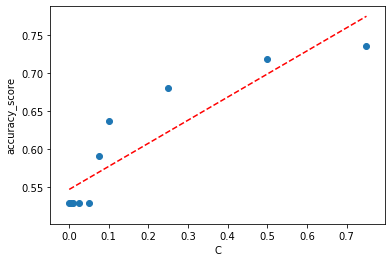

In [51]:
#Scatter plot with regession analysis for observing the influence of variation of C on accuracy score
reg_output('C','accuracy_score',c_df)

Given that the earlier for loop suggested the C parameter could be a significant determinant of the model’s accuracy, another dictionary was produced varying the C parameter between 0.001 and 0.750, but keeping all other variables the same. The model’s C values and accuracy scores were stored in a dataframe, plotted on a scatter plot. Regression analysis revealed an r-squared value of 0.817, indicating that the C value had explained roughly 81.7% of the accuracy score’s variability around its mean, suggesting it is a strong positive predictor of the classifier’s accuracy score.

**Decision Tree Classifier**

The Decision Tree Classifier was selected to produce a classifier for the textual data. For the decision tree, GridSearchCV did not work effectively given our data, so to evaluate the performance of different combinations of parameters, a list of decision tree classifiers varying the criterion, splitter, and max_depth parameters was looped through, with the accuracy scores being printed, alongside the fit time and the score time for each iteration. The criterion parameter indicated the function to measure the quality of a split. The splitter parameter indicated the strategy used to choose the split at each node. The max_depth parameter indicated the maximum depth of the tree.

In [53]:
#Devision Tree Classifier Grid did not work because of values in DataFrame
# %%time
# dct_param_grid = {
#     'criterion':["gini","entropy"],
#     'splitter':["best","random"],
#     'max_depth':[10,25,50,100,None],
#     'min_samples_split':[0,2,5,10],
#     'max_features':[10,25,50,100,"auto","sqrt","log2",None],
#     'class_weight':['balanced',None]
# }
# dct_grid = GridSearchCV(DecisionTreeClassifier,param_grid = dct_param_grid, cv=10,verbose=5,n_jobs=-1)
# dct_grid.fit(feature300_array,y_labels)
# print("DCT Best Estimator : " , dct_grid.best_estimator_)
# print("DCT Best Score : " , dct_grid.best_score_)
# print("DCT Best Parameters : " , dct_grid.best_params_)

In [55]:
#Decision Tree Classifier Dictionary and Score Dictionary for iteration and Compare Scores
dct_dict = {}
dct_dict['defaultDCT'] = DecisionTreeClassifier(criterion="entropy")
dct_dict['DCT_1'] = DecisionTreeClassifier(criterion="gini",splitter="best")
dct_dict['DCT_2'] = DecisionTreeClassifier(criterion="gini",splitter="random")
dct_dict['DCT_3'] = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=None)
dct_dict['DCT_4'] = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=10)
dct_dict['DCT_5'] = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=25)
dct_dict['DCT_6'] = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=50)
dct_dict['DCT_7'] = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=100)

dct_scores ={}
for n in dct_dict:
        dct_scores[n] = cross_validate( # perform cross-validation
        dct_dict[n], # classifier object
        feature300_array, # feature matrix
        y_labels, # gold labels
        cv=10, #number of folds
        scoring = ['accuracy']
        #scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'] # scoring methods
    )


In [56]:
#Decision Tree Classifier output displaying accuracy scores
compare_scores(dct_scores)

,fit_time,score_time,test_accuracy
defaultDCT,0.008155,0.000472,0.662000
DCT_1,0.007024,0.000381,0.664000
DCT_2,0.005973,0.000330,0.662000
DCT_3,0.006814,0.000321,0.654000
DCT_4,0.004680,0.000311,0.688000
DCT_5,0.006683,0.000354,0.688000
DCT_6,0.007110,0.000371,0.646000
DCT_7,0.006929,0.000322,0.664000


The highest score was 0.688 and the low score was 0.646. The best performing model had criterion set to gini, splitter set to best, and max depth set to 25.


In [57]:
#Confidence Interval for highest scoring classifier
accuracy_conf_it(dct_scores)

Key : DCT_5
Max Mean : 0.688
95% confidence interval: (0.6607037201763002, 0.7152962798236997)


Then, the classifier that produced the highest score was used to produce a 95% confidence interval, the low boundary was roughly 0.661 and the high boundary was roughly 0.715. In other words, we are 95% confident that the model would produce an accuracy score between 0.661 and 0.715.

In [59]:
#Decision Tree Classifier Dictionary for observing the influence of variation of max_depth on accuracy score
#%%time
depth_DCT_dict = {}
depth_DCT_dict['DCT_1'] = DecisionTreeClassifier(max_depth=1)
depth_DCT_dict['DCT_2'] = DecisionTreeClassifier(max_depth=5)
depth_DCT_dict['DCT_3'] = DecisionTreeClassifier(max_depth=10)
depth_DCT_dict['DCT_4'] = DecisionTreeClassifier(max_depth=25)
depth_DCT_dict['DCT_5'] = DecisionTreeClassifier(max_depth=50)
depth_DCT_dict['DCT_6'] = DecisionTreeClassifier(max_depth=75)
depth_DCT_dict['DCT_7'] = DecisionTreeClassifier(max_depth=100)
depth_DCT_dict['DCT_8'] = DecisionTreeClassifier(max_depth=150)
depth_DCT_dict['DCT_9'] = DecisionTreeClassifier(max_depth=200)
depth_DCT_dict['DCT_10'] = DecisionTreeClassifier(max_depth=250)

In [60]:
%%time
depth_DCT_scores ={}
for n in depth_DCT_dict:
        depth_DCT_scores[n] = cross_validate( # perform cross-validation
        depth_DCT_dict[n], # classifier object
        feature300_array, # feature matrix
        y_labels, # gold labels
        cv=10, #number of folds
        scoring = ['accuracy']
        #scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'] # scoring methods
    )

CPU times: user 639 ms, sys: 5.64 ms, total: 645 ms
Wall time: 651 ms


In [61]:
depth_list = []
accuracy_list = []
key_list = list(depth_DCT_dict.keys())
for key in key_list:
    max_depth = depth_DCT_dict[key].max_depth
    depth_list.append(max_depth)  
    
    acc_array = depth_DCT_scores[key]['test_accuracy']
    mean_acc_array= np.mean(acc_array)
    accuracy_list.append(mean_acc_array)
depth_df = pd.DataFrame({'max_depth':depth_list,'accuracy_score':accuracy_list})
print(depth_df)

   max_depth  accuracy_score
0          1           0.676
1          5           0.744
2         10           0.700
3         25           0.702
4         50           0.664
5         75           0.658
6        100           0.664
7        150           0.662
8        200           0.646
9        250           0.664


For X = max_depth and Y = accuracy_score : 
Intercept is 0.697
r-squared is 0.411
r-value is 0.641


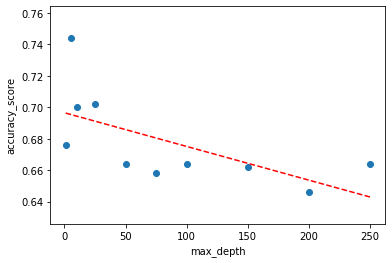

In [63]:
#Scatter plot with regession analysis for observing the influence of variation of max_depth on accuracy score
reg_output('max_depth','accuracy_score',depth_df)

Given that the earlier for loop suggested the max_depth parameter was a significant determinant of the model’s accuracy, another dictionary was produced varying the max_depth parameter between 1 and 250, but keeping all other variables the same. The model’s max_depth values and accuracy scores were stored in a dataframe, plotted on a scatter plot. Regression analysis revealed that an r-squared value of 0.411, indicating that the max_depth value had explained roughly 41.1% of the accuracy score’s variability around its mean, suggesting it is a somewhat strong positive predictor of the classifier’s accuracy score.

**Random Forest Classifier**

The Random Forest Classifier was selected to produce a classifier for the textual data. For the random forest classifier, GridSearchCV did not work effectively given our data, so to evaluate the performance of different combinations of parameters, a list of random forest classifiers varying the n_estimators, criterion, samples_split, and max_features parameters was looped through, with the accuracy scores being printed, alongside the fit time and the score time for each iteration. The n_estimators parameter indicated the number of trees in the model’s forest. The criterion parameter, similarly as in the decision tree classifier indicated the function to measure the quality of a split. The min_samples_split parameter indicated the minimum number of samples required to split an internal node. The max features parameter indicated the number of features to consider when looking for the best split. 

In [65]:
#Again, GridSearchCV was not appropriate given the data, and thus it was manually varied below
#Random Forest Classifier Dictionary and Score Dictionary for iteration and Compare Scores
#%%time
rfc_dict = {}
rfc_dict['defaultRFC'] = RandomForestClassifier()
rfc_dict['RFC_1'] = RandomForestClassifier(n_estimators=20)
rfc_dict['RFC_2'] = RandomForestClassifier(n_estimators=50)
rfc_dict['RFC_3'] = RandomForestClassifier(n_estimators=100)
rfc_dict['RFC_4'] = RandomForestClassifier(n_estimators=150)
rfc_dict['RFC_5'] = RandomForestClassifier(n_estimators=200)
rfc_dict['RFC_6'] = RandomForestClassifier(n_estimators=100,criterion="gini")
rfc_dict['RFC_7'] = RandomForestClassifier(n_estimators=100,criterion="entropy")
rfc_dict['RFC_8'] = RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=10)
rfc_dict['RFC_9'] = RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=15)
rfc_dict['RFC_10'] = RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=20)
rfc_dict['RFC_11'] = RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=2)
rfc_dict['RFC_12'] = RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=2,max_features="auto")
rfc_dict['RFC_13'] = RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=2,max_features="log2")
rfc_dict['RFC_14'] = RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=2,max_features=5)
rfc_dict['RFC_15'] = RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=2,max_features="auto", bootstrap=True)
rfc_dict['RFC_16'] = RandomForestClassifier(n_estimators=100,criterion="gini",min_samples_split=2,max_features="auto", bootstrap=False)

#print(rfc_dict)
#nans in training - could be a label in the test set that wasn't in train set 
#unless theres a ssytematic ordering to the list
rfc_scores ={}
for n in rfc_dict:
        rfc_scores[n] = cross_validate( # perform cross-validation
        rfc_dict[n], # classifier object
        feature300_array, # feature matrix
        y_labels, # gold labels
        cv=10, #number of folds
        #scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'] # scoring methods
        scoring=['accuracy']
    )


In [66]:
#Compare Scores output displaying accuracy scores
compare_scores(rfc_scores)

,fit_time,score_time,test_accuracy
defaultRFC,0.192586,0.009979,0.758000
RFC_1,0.037161,0.002435,0.746000
RFC_2,0.104197,0.005892,0.760000
RFC_3,0.181566,0.009510,0.750000
RFC_4,0.291167,0.014333,0.748000
RFC_5,0.406741,0.020106,0.756000
RFC_6,0.210312,0.010820,0.754000
RFC_7,0.213075,0.010775,0.758000
RFC_8,0.198845,0.011188,0.762000
RFC_9,0.203945,0.012098,0.770000


The highest score was 0.770 and the lowest score was 0.744. The highest performing model had n_estimators set to 100, criterion set to gini, min_samples_split set to 15, and max_features set to the default of auto.

In [67]:
#Confidence Interval for highest scoring classifier
accuracy_conf_it(rfc_scores)

Key : RFC_9
Max Mean : 0.7700000000000001
95% confidence interval: (0.7365996497576898, 0.8034003502423105)


Then, the classifier that produced the highest score was used to produce a 95% confidence interval, the low boundary was roughly 0.737 and the high boundary was 0.803. In other words, we are 95% confident that the model would produce an accuracy score between 0.737 and 0.803.

In [70]:
#Random Forest Classifier Dictionary for observing the influence of variation of n_estimators on accuracy score
#%%time
est_rfc_dict = {}
est_rfc_dict['RFC_1'] = RandomForestClassifier(n_estimators=10)
est_rfc_dict['RFC_2'] = RandomForestClassifier(n_estimators=20)
est_rfc_dict['RFC_3'] = RandomForestClassifier(n_estimators=50)
est_rfc_dict['RFC_4'] = RandomForestClassifier(n_estimators=100)
est_rfc_dict['RFC_5'] = RandomForestClassifier(n_estimators=150)
est_rfc_dict['RFC_6'] = RandomForestClassifier(n_estimators=200)
est_rfc_dict['RFC_7'] = RandomForestClassifier(n_estimators=250)
est_rfc_dict['RFC_8'] = RandomForestClassifier(n_estimators=300)
est_rfc_dict['RFC_9'] = RandomForestClassifier(n_estimators=350)
est_rfc_dict['RFC_10'] = RandomForestClassifier(n_estimators=400)

In [71]:
#Random Forst Score Dictionary for Compare Scores to observe the influence of variation of n_estimators on accuracy score
#%%time
est_rfc_scores ={}
for n in est_rfc_dict:
        est_rfc_scores[n] = cross_validate( # perform cross-validation
        est_rfc_dict[n], # classifier object
        feature300_array, # feature matrix
        y_labels, # gold labels
        cv=10, #number of folds
        scoring = ['accuracy']
        #scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'] # scoring methods
    )

In [74]:
est_list = []
accuracy_list = []
key_list = list(est_rfc_dict.keys())
for key in key_list:
    est = est_rfc_dict[key].n_estimators
    est_list.append(est)    
    acc_array = est_rfc_scores[key]['test_accuracy']
    mean_acc_array= np.mean(acc_array)
    accuracy_list.append(mean_acc_array)
est_df = pd.DataFrame({'n_estimators':est_list,'accuracy_score':accuracy_list})
print(est_df)

   n_estimators  accuracy_score
0            10           0.738
1            20           0.762
2            50           0.762
3           100           0.762
4           150           0.764
5           200           0.756
6           250           0.756
7           300           0.762
8           350           0.760
9           400           0.756


For X = n_estimators and Y = accuracy_score : 
Intercept is 0.756
r-squared is 0.042
r-value is 0.205


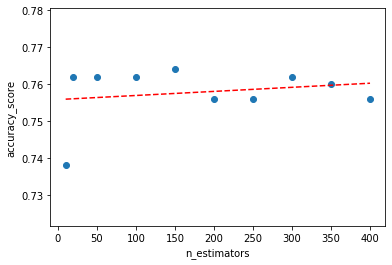

In [75]:
#Scatter plot with regession analysis for observing the influence of variation of  on accuracy score
reg_output('n_estimators','accuracy_score',est_df)

Given that the earlier for loop suggested the n_estimarors parameter was a significant determinant of the model’s accuracy, another dictionary was produced varying the n_estimators parameter between 10 and 400, but keeping all other variables the same. The model’s n_estimators values and accuracy scores were stored in a dataframe, plotted on a scatter plot. Regression analysis revealed that the model's r-squared value was 0.205, indicating that the n_estimators value had explained roughly 20.5% of the accuracy score’s variability around its mean, suggesting it is a weak-to-moderate predictor of the classifier’s accuracy score.

**Multi-layer Perceptron classifier (MLP)**

The MLP, or Multi-layer Perceptron classifier was selected to produce a classifier for the textual data; unlike many other classifiers, the MLP classifier relies on an underlying Neural Network for classification. The GridSearchCV Model was initially used to obtain the best possible combination of parameters to pass through the classifier. The variables alpha, hidden_layer_sizes, and max_iter were varied. Alpha indicated the L2 penalty regularization term parameter. For hidden_layer_sizes the nth element represents the number of neurons in the nth hidden layer. The max_iter parameter indicates the maximum number of iterations. 


In [76]:
#Gridsearch was Previously used but was extremely time consuming. Ouput was as follows:
# MLP Best Score :  0.8160000000000001
# MLP Best Parameters :  {'alpha': 2, 'hidden_layer_sizes': 25, 'max_iter': 100}
# %%time
# mlp_param_grid = {
#     'hidden_layer_sizes': [0,1,5,10,25,50,100,200],
#     'alpha':[0.001,0.005,0.01,0.25,0.05,0.075,0.1,0.5,0.75,1,2,5,10],
#     'max_iter':[100,200,500,1000,None]
# }
# mlp_grid = GridSearchCV(MLPClassifier(),param_grid = mlp_param_grid, cv=10,verbose=5,n_jobs=-1)
# mlp_grid.fit(feature300_array,y_labels)
# print("MLP Best Estimator : " , mlp_grid.best_estimator_)
# print("MLP Best Score : " , mlp_grid.best_score_)
# print("MLP Best Parameters : " , mlp_grid.best_params_)

This process (commented out above) took an extensive amount of time to run, but revealed a high score of 0.770, with the best combination of parameters setting alpha to 2, hidden_layer_sizes to 25, and max_iter to 100. 

In [78]:
#MLP Classifier Dictionary for iteration (Certain iterations were commented out based on relevancy)
#%%time
mlp_dict = {}
mlp_dict['defaultMLP'] = MLPClassifier()
mlp_dict['MLP_1'] = MLPClassifier(alpha=0.01)
# mlp_dict['MLP_2'] = MLPClassifier(alpha=0.05)
# mlp_dict['MLP_3'] = MLPClassifier(alpha=0.1)
mlp_dict['MLP_4'] = MLPClassifier(alpha=0.5)
mlp_dict['MLP_5'] = MLPClassifier(alpha=1.0)
# mlp_dict['MLP_6'] = MLPClassifier(alpha=1.5)
mlp_dict['MLP_7'] = MLPClassifier(alpha=2.0)
mlp_dict['MLP_7'] = MLPClassifier(alpha=3.0)
mlp_dict['MLP_8'] = MLPClassifier(alpha=2.0,hidden_layer_sizes = 10)
mlp_dict['MLP_9'] = MLPClassifier(alpha=2.0,hidden_layer_sizes = 25)
mlp_dict['MLP_10'] = MLPClassifier(alpha=2.0,hidden_layer_sizes = 50)
# mlp_dict['MLP_10'] = MLPClassifier(alpha=2.0,hidden_layer_sizes = 100)
# mlp_dict['MLP_11'] = MLPClassifier(alpha=2.0,hidden_layer_sizes = 150)
mlp_dict['MLP_12'] = MLPClassifier(alpha=2.0,hidden_layer_sizes = 25,max_iter=50)
mlp_dict['MLP_13'] = MLPClassifier(alpha=2.0,hidden_layer_sizes = 25,max_iter=100)
mlp_dict['MLP_14'] = MLPClassifier(alpha=2.0,hidden_layer_sizes = 25,max_iter=200)

In [79]:
#MLP Score Dictionary for Compare Scores
#%%time
mlp_scores ={}
for n in mlp_dict:
        mlp_scores[n] = cross_validate( # perform cross-validation
        mlp_dict[n], # classifier object
        feature300_array, # feature matrix
        y_labels, # gold labels
        cv=10, #number of folds
        scoring = ['accuracy']
        #scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'] # scoring methods
    )

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [80]:
#Compare Scores output displaying accuracy scores
compare_scores(mlp_scores)

,fit_time,score_time,test_accuracy
defaultMLP,1.008730,0.001128,0.720000
MLP_1,1.194848,0.001143,0.708000
MLP_4,1.113851,0.001081,0.750000
MLP_5,1.130596,0.001110,0.758000
MLP_7,1.165864,0.000910,0.762000
MLP_8,0.462168,0.001101,0.762000
MLP_9,0.542734,0.001039,0.760000
MLP_10,0.711782,0.001121,0.770000
MLP_12,0.243337,0.001240,0.746000
MLP_13,0.308574,0.001029,0.758000


In order to evaluate the performance of different combinations of parameters, a list of MLP classifiers varying the alpha, hidden_layer_sizes, and max_iter parameters was looped through, with the accuracy scores being printed, alongside the fit time and the score time for each iteration. This time, the best model had the parameter alpha set to 2, hidden_layer_sizes set to 50, and max_iter set to the default of 200. The highest score was 0.770 and the lowest score was 0.708.


In [87]:
#Confidence Interval for highest scoring classifier
accuracy_conf_it(mlp_scores)

Key : MLP_14
Max Mean : 0.77
95% confidence interval: (0.7224408691964241, 0.8175591308035759)


Then, the classifier that produced the highest score was used to produce a 95% confidence interval, the low boundary was roughly 0.722 and the high boundary was 0.818. In other words, we are 95% confident that the model would produce an accuracy score between 0.722 and 0.818.

In [83]:
#MLP Classifier Dictionary for observing the influence of variation of alpha on accuracy score
#%%time
alpha_mlp_dict = {}
alpha_mlp_dict['defaultMLP'] = MLPClassifier()
alpha_mlp_dict['MLP_1'] = MLPClassifier(alpha=0.01)
alpha_mlp_dict['MLP_2'] = MLPClassifier(alpha=0.05)
alpha_mlp_dict['MLP_3'] = MLPClassifier(alpha=0.075)
alpha_mlp_dict['MLP_4'] = MLPClassifier(alpha=0.10)
alpha_mlp_dict['MLP_5'] = MLPClassifier(alpha=0.25)
alpha_mlp_dict['MLP_6'] = MLPClassifier(alpha=0.50)
alpha_mlp_dict['MLP_7'] = MLPClassifier(alpha=0.75)
alpha_mlp_dict['MLP_8'] = MLPClassifier(alpha=1.00)
alpha_mlp_dict['MLP_9'] = MLPClassifier(alpha=1.25)
alpha_mlp_dict['MLP_10'] = MLPClassifier(alpha=1.50)
alpha_mlp_dict['MLP_11'] = MLPClassifier(alpha=1.75)
alpha_mlp_dict['MLP_12'] = MLPClassifier(alpha=2.00)
alpha_mlp_dict['MLP_13'] = MLPClassifier(alpha=2.25)
alpha_mlp_dict['MLP_14'] = MLPClassifier(alpha=2.50)
alpha_mlp_dict['MLP_15'] = MLPClassifier(alpha=2.75)
alpha_mlp_dict['MLP_16'] = MLPClassifier(alpha=3.00)

In [84]:
#MLP Score Dictionary for Compare Scores to observe the influence of variation of alpha on accuracy score
#%%time
alpha_mlp_scores ={}
for n in alpha_mlp_dict:
        alpha_mlp_scores[n] = cross_validate( # perform cross-validation
        alpha_mlp_dict[n], # classifier object
        feature300_array, # feature matrix
        y_labels, # gold labels
        cv=10, #number of folds
        scoring = ['accuracy']
        #scoring=['accuracy', 'f1', 'f1_macro', 'f1_micro'] # scoring methods
    )

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

In [85]:
alpha_list = []
accuracy_list = []

key_list = list(alpha_mlp_dict.keys())
for key in key_list:
    alpha = alpha_mlp_dict[key].alpha
    alpha_list.append(alpha)
    
    acc_array = alpha_mlp_scores[key]['test_accuracy'] 
    mean_acc_array= np.mean(acc_array)
    accuracy_list.append(mean_acc_array)
aa_df = pd.DataFrame({'alpha':alpha_list,'accuracy_score':accuracy_list})
print(aa_df)

     alpha  accuracy_score
0   0.0001           0.740
1   0.0100           0.732
2   0.0500           0.736
3   0.0750           0.724
4   0.1000           0.740
5   0.2500           0.740
6   0.5000           0.748
7   0.7500           0.758
8   1.0000           0.764
9   1.2500           0.764
10  1.5000           0.766
11  1.7500           0.768
12  2.0000           0.774
13  2.2500           0.766
14  2.5000           0.764
15  2.7500           0.756
16  3.0000           0.770


For X = alpha and Y = accuracy_score : 
Intercept is 0.740
r-squared is 0.666
r-value is 0.816


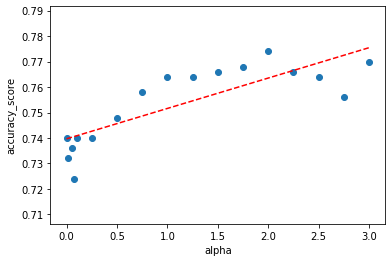

In [86]:
#Scatter plot with regession analysis for observing the influence of variation of alpha on accuracy score
reg_output('alpha','accuracy_score',aa_df)

Given that the earlier for loop suggested the alpha parameter was a significant determinant of the model’s accuracy, another dictionary was produced varying the alpha parameter between 0.010 and 3.000, but keeping all other variables the same. The model’s alpha values and accuracy scores were stored in a dataframe, plotted on a scatter plot. Regression analysis revealed an r-squared value of 0.666, indicating that the alpha value had explained roughly 66.6% of the accuracy score’s variability around its mean, suggesting it is a moderately strong positive predictor of the classifier’s accuracy score.


## 4. Discussion and conclusions

The model that worked the best was the MLP Classifier, producing a high score of .770 and a confidence interval ranging between roughly 0.722 and 0.818. The output, especially the linear regression suggested that the alpha parameter was relatively influential on the accuracy of, bearing an R-Squared value of 0.666.  This was surprising as we had previously anticipated that the best model would be the decision tree mode as it had a tendency to overfit. This investigation was limited by the number of parameters we were able to pass through each model, as well as the range of models we were able to evaluate. Given more time, we would be able to let each model have more processing time and run more parameters through to obtain the most optimal possible results. In the future, it would be rewarding to compare classifier performance on 2016 election data thoroughly with similar data for future elections. 

From our data exploration stage (more information in appendix) we found that Trump is definitely a high frequency token word and was included in our features used for the final model. Other high frequency tokens include political officials including Hillary Clinton, Barack Obama, and John Mccain, and countries such as Iran and Russia. Finally, we initially intended to also evaluate our classifier on 2020 election related news articles, in order to see if the performance of the model holds at a fairly accurate rate.  This project scope and the issue of fake news itself is definitely one that was really important to us and we were extremely interested in diving into this classification project. However, we wanted to tackle 2020 data sets as well and unfortunately there just wasn’t any large enough datasets that we could find comparable to 2016 given 2020’s recency. Thus, while we finished pre-processing the data for multiple smaller datasets (also included in Appendix) we ultimately did not include this in our project due to time constraints and would like to pursue this in future work! 